In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

# New Section

In [ ]:
np.random.seed(42)

In [ ]:
data = pd.read_csv("ML_DATA.csv")

In [ ]:
data.head()

,Material,Normalized_TEMP_Cels,Normalized_O2_PP_mtorr,Normalized_FREQ_Hz,MP,Density (g/cm3),Formation Energy (eV/atom),Molar Mass (g/mol),Weighted Avg Electronegativity,Wt Avg Atomic Number,Wt Avg Conductivity,Wt avg Radius,Wt avg Specific Heat(J/kg/K),Wt avg Ionisation(KJ/mol),Wt avg Hardness(MPa)
0,Zn0,539.60,8132.63,6.369512,1975,5.70,-1.647,81.38,2.545000,19.000000,60.013290,95.000000,492.39,986.51,331.00
1,YBCO,689.17,36361.91,4.570000,1050,6.20,-2.175,666.19,2.521538,22.615385,96.398900,114.538461,306.60,623.96,352.91
2,WO3,443.17,447.89,6.527700,1473,7.14,-2.178,231.84,3.170000,24.500000,42.519935,84.250000,294.93,882.60,2037.94
3,VO2,518.23,42.78,7.200000,1967,4.47,-2.476,82.94,2.836667,13.000000,10.351053,89.000000,654.89,906.68,385.72
4,TiO2,549.21,115.18,9.122000,1843,4.31,-3.316,79.866,2.806667,12.666667,7.351053,90.666667,679.86,921.27,429.13


In [ ]:
data = data.drop(['Material', 'Formation Energy (eV/atom)'], axis=1)

In [ ]:
data.dtypes

Normalized_TEMP_Cels              float64
Normalized_O2_PP_mtorr            float64
Normalized_FREQ_Hz                float64
MP                                 object
Density (g/cm3)                   float64
Molar Mass (g/mol)                 object
Weighted Avg Electronegativity    float64
Wt Avg Atomic Number              float64
Wt Avg Conductivity               float64
Wt avg Radius                     float64
Wt avg Specific Heat(J/kg/K)      float64
Wt avg Ionisation(KJ/mol)         float64
Wt avg Hardness(MPa)              float64
dtype: object

In [ ]:
data.isnull().sum()

Normalized_TEMP_Cels              0
Normalized_O2_PP_mtorr            0
Normalized_FREQ_Hz                0
MP                                0
Density (g/cm3)                   0
Molar Mass (g/mol)                0
Weighted Avg Electronegativity    0
Wt Avg Atomic Number              0
Wt Avg Conductivity               0
Wt avg Radius                     0
Wt avg Specific Heat(J/kg/K)      0
Wt avg Ionisation(KJ/mol)         0
Wt avg Hardness(MPa)              0
dtype: int64

In [ ]:
data['MP'] = [i.replace(',','') for i in data['MP']]

In [ ]:
data.isnull().sum()

Normalized_TEMP_Cels              0
Normalized_O2_PP_mtorr            0
Normalized_FREQ_Hz                0
MP                                0
Density (g/cm3)                   0
Molar Mass (g/mol)                0
Weighted Avg Electronegativity    0
Wt Avg Atomic Number              0
Wt Avg Conductivity               0
Wt avg Radius                     0
Wt avg Specific Heat(J/kg/K)      0
Wt avg Ionisation(KJ/mol)         0
Wt avg Hardness(MPa)              0
dtype: int64

In [ ]:
data1=data.copy(deep=True)
data2=data.copy(deep=True)

In [ ]:
X = data.iloc[:,2:]
Y = data.iloc[:, 0:2]
# Y = data[['Normalized_TEMP_Cels','Normalized_O2_PP_mtorr']]

In [ ]:
X.head()

,Normalized_FREQ_Hz,MP,Density (g/cm3),Molar Mass (g/mol),Weighted Avg Electronegativity,Wt Avg Atomic Number,Wt Avg Conductivity,Wt avg Radius,Wt avg Specific Heat(J/kg/K),Wt avg Ionisation(KJ/mol),Wt avg Hardness(MPa)
0,6.369512,1975,5.70,81.38,2.545000,19.000000,60.013290,95.000000,492.39,986.51,331.00
1,4.570000,1050,6.20,666.19,2.521538,22.615385,96.398900,114.538461,306.60,623.96,352.91
2,6.527700,1473,7.14,231.84,3.170000,24.500000,42.519935,84.250000,294.93,882.60,2037.94
3,7.200000,1967,4.47,82.94,2.836667,13.000000,10.351053,89.000000,654.89,906.68,385.72
4,9.122000,1843,4.31,79.866,2.806667,12.666667,7.351053,90.666667,679.86,921.27,429.13


In [ ]:
Y.head()

,Normalized_TEMP_Cels,Normalized_O2_PP_mtorr
0,539.60,8132.63
1,689.17,36361.91
2,443.17,447.89
3,518.23,42.78
4,549.21,115.18


In [ ]:
data.shape

(61, 13)

In [ ]:
data1.drop(['Normalized_O2_PP_mtorr'], axis=1, inplace=True)

## Correlation for only temperature

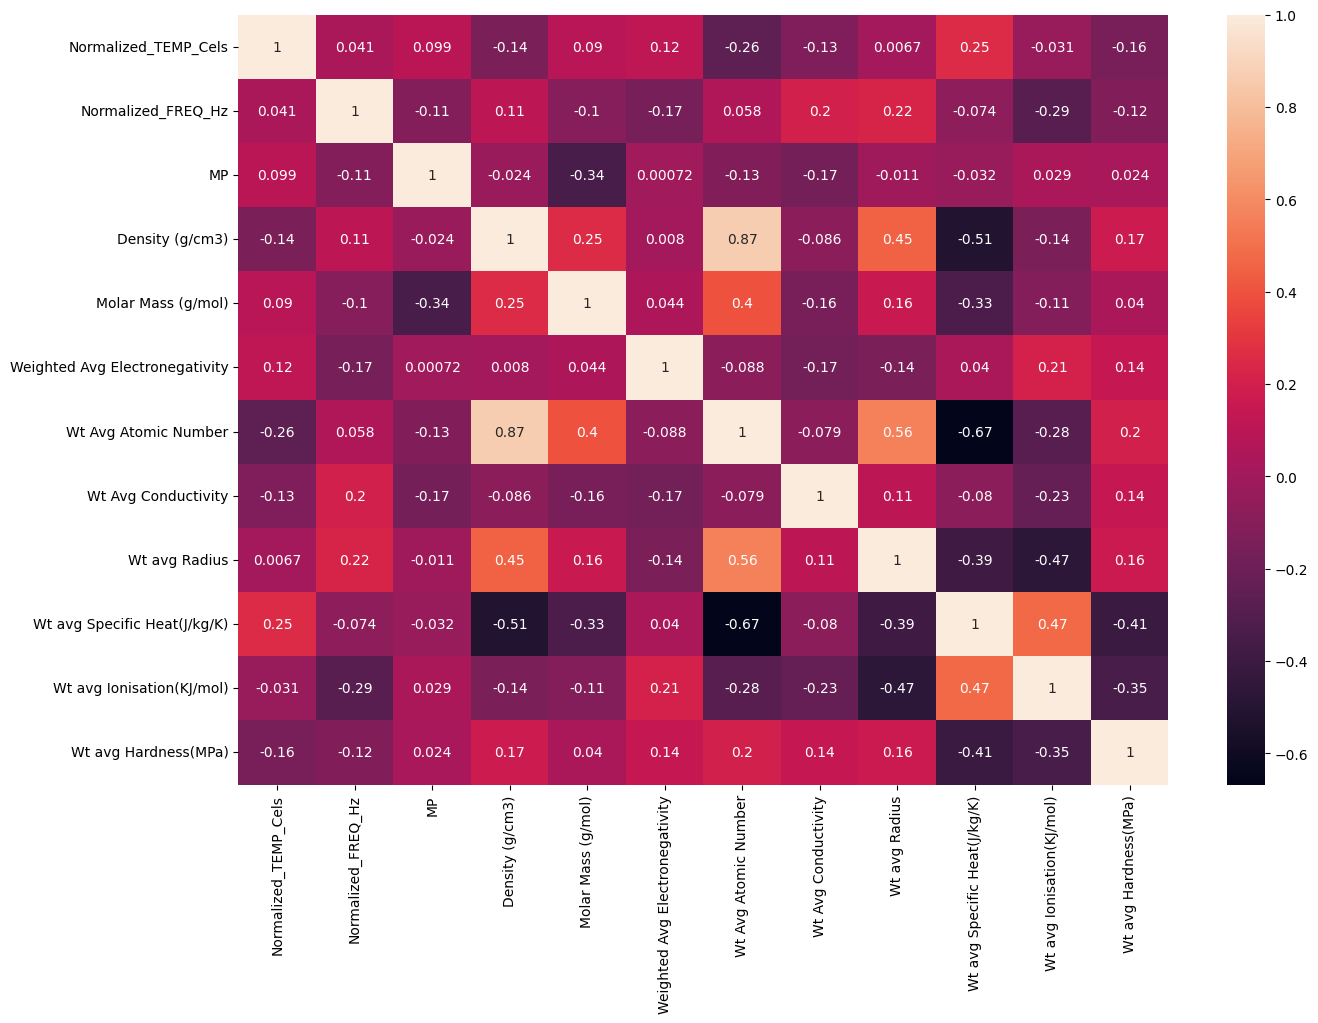

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(), annot = True, ax=ax)
plt.show()

## Correlation between temperature and pressure is not good so both are to be predicted separately


In [ ]:
data1.drop(['Normalized_FREQ_Hz','MP','Molar Mass (g/mol)','Wt avg Radius','Wt avg Ionisation(KJ/mol)'], axis=1, inplace=True)

In [ ]:
data1

,Normalized_TEMP_Cels,Density (g/cm3),Weighted Avg Electronegativity,Wt Avg Atomic Number,Wt Avg Conductivity,Wt avg Specific Heat(J/kg/K),Wt avg Hardness(MPa)
0,539.60,5.70,2.545000,19.000000,60.013290,492.390000,331.00
1,689.17,6.20,2.521538,22.615385,96.398900,306.600000,352.91
2,443.17,7.14,3.170000,24.500000,42.519935,294.930000,2037.94
3,518.23,4.47,2.836667,13.000000,10.351053,654.890000,385.72
4,549.21,4.31,2.806667,12.666667,7.351053,679.860000,429.13
...,...,...,...,...,...,...,...
56,500.00,21.13,2.280000,78.000000,72.000000,133.000000,392.00
57,395.13,5.75,2.135000,32.000000,48.602500,467.500000,101.50
58,670.15,4.89,2.666000,21.800000,20.815948,679.400000,212.60
59,540.71,4.77,2.440000,24.666667,43.470000,553.666667,500.00


In [ ]:
X1 = data1.iloc[:,1:]
Y1 = data1.iloc[:,0]

## For predicting only temperature

In [ ]:
X1.head()

,Density (g/cm3),Weighted Avg Electronegativity,Wt Avg Atomic Number,Wt Avg Conductivity,Wt avg Specific Heat(J/kg/K),Wt avg Hardness(MPa)
0,5.70,2.545000,19.000000,60.013290,492.39,331.00
1,6.20,2.521538,22.615385,96.398900,306.60,352.91
2,7.14,3.170000,24.500000,42.519935,294.93,2037.94
3,4.47,2.836667,13.000000,10.351053,654.89,385.72
4,4.31,2.806667,12.666667,7.351053,679.86,429.13


In [ ]:
from itertools import accumulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r_squared_l = r2_score(y_test, y_pred)
print("R-squared:", r_squared_l)
mse_l = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_l)

R-squared: -0.12510237081421272
Mean Squared Error: 9213.833168368188


In [ ]:
import xgboost as xgb

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters
params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
r_squared_x = r2_score(y_test, y_pred)
print("R-squared:", r_squared_x)
mse_x = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_x)


R-squared: 0.11966547696022256
Mean Squared Error: 7209.348800654954


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM Regressor
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r_squared_sv = r2_score(y_test, y_pred)
print("R-squared:", r_squared_sv)
mse_sv = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_sv)

R-squared: -0.21618854684590483
Mean Squared Error: 9959.767806558737


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
y_pred= nn_model.predict(X_test).flatten()

# Evaluate the model
r_squared_te = r2_score(y_test, y_pred)
print("R-squared:", r_squared_te)
mse_te = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_te)

1/1 [==============================] - 1s 515ms/step
R-squared: -0.8234300209046934
Mean Squared Error: 14932.667855505091


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_d = mean_squared_error(y_test, y_pred)
r_squared_d = r2_score(y_test, y_pred)
print("R-squared:", r_squared_d)
print("Mean Squared Error:", mse_d)

R-squared: 0.3698975146249702
Mean Squared Error: 5160.116385692307


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the random forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_r = mean_squared_error(y_test, y_pred)
r_squared_r = r2_score(y_test, y_pred)
print("R-squared:", r_squared_r)
print("Mean Squared Error:", mse_r)

R-squared: 0.34593242233463006
Mean Squared Error: 5356.374404478584


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the gradient boosting regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_g = mean_squared_error(y_test, y_pred)
r_squared_g = r2_score(y_test, y_pred)
print("R-squared:", r_squared_g)
print("Mean Squared Error:", mse_g)

R-squared: 0.46142444819980155
Mean Squared Error: 4410.572239091207


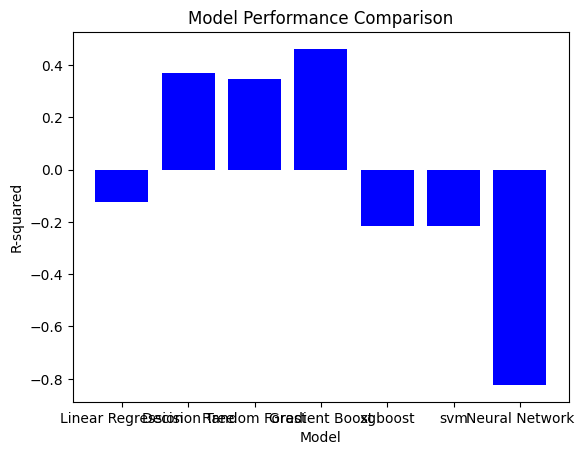

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost','xgboost','svm','Neural Network']

r_squared_values = [r_squared_l, r_squared_d, r_squared_r, r_squared_g,r_squared_x,r_squared_sv,r_squared_te]

plt.bar(model_names, r_squared_values, color='blue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Performance Comparison')
plt.show()


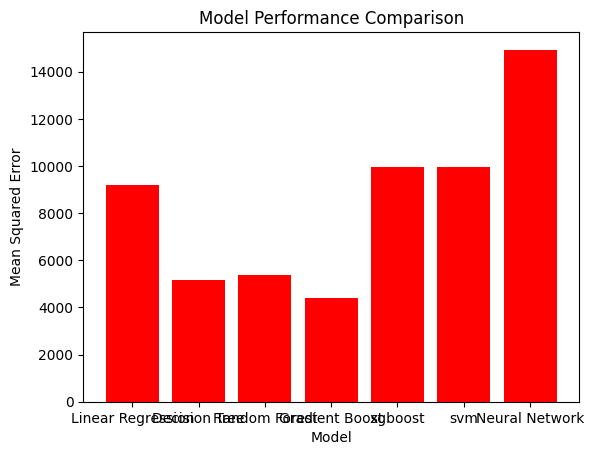

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost','xgboost','svm','Neural Network']

mse_values = [mse_l, mse_d,mse_r,mse_g,mse_x,mse_sv,mse_te]

plt.bar(model_names, mse_values, color='red')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()


## If Pressure is to be predicted

In [ ]:
data2.drop(['Normalized_TEMP_Cels'], axis=1, inplace=True)

In [ ]:
data2.head()

,Normalized_O2_PP_mtorr,Normalized_FREQ_Hz,MP,Density (g/cm3),Molar Mass (g/mol),Weighted Avg Electronegativity,Wt Avg Atomic Number,Wt Avg Conductivity,Wt avg Radius,Wt avg Specific Heat(J/kg/K),Wt avg Ionisation(KJ/mol),Wt avg Hardness(MPa)
0,8132.63,6.369512,1975,5.70,81.38,2.545000,19.000000,60.013290,95.000000,492.39,986.51,331.00
1,36361.91,4.570000,1050,6.20,666.19,2.521538,22.615385,96.398900,114.538461,306.60,623.96,352.91
2,447.89,6.527700,1473,7.14,231.84,3.170000,24.500000,42.519935,84.250000,294.93,882.60,2037.94
3,42.78,7.200000,1967,4.47,82.94,2.836667,13.000000,10.351053,89.000000,654.89,906.68,385.72
4,115.18,9.122000,1843,4.31,79.866,2.806667,12.666667,7.351053,90.666667,679.86,921.27,429.13


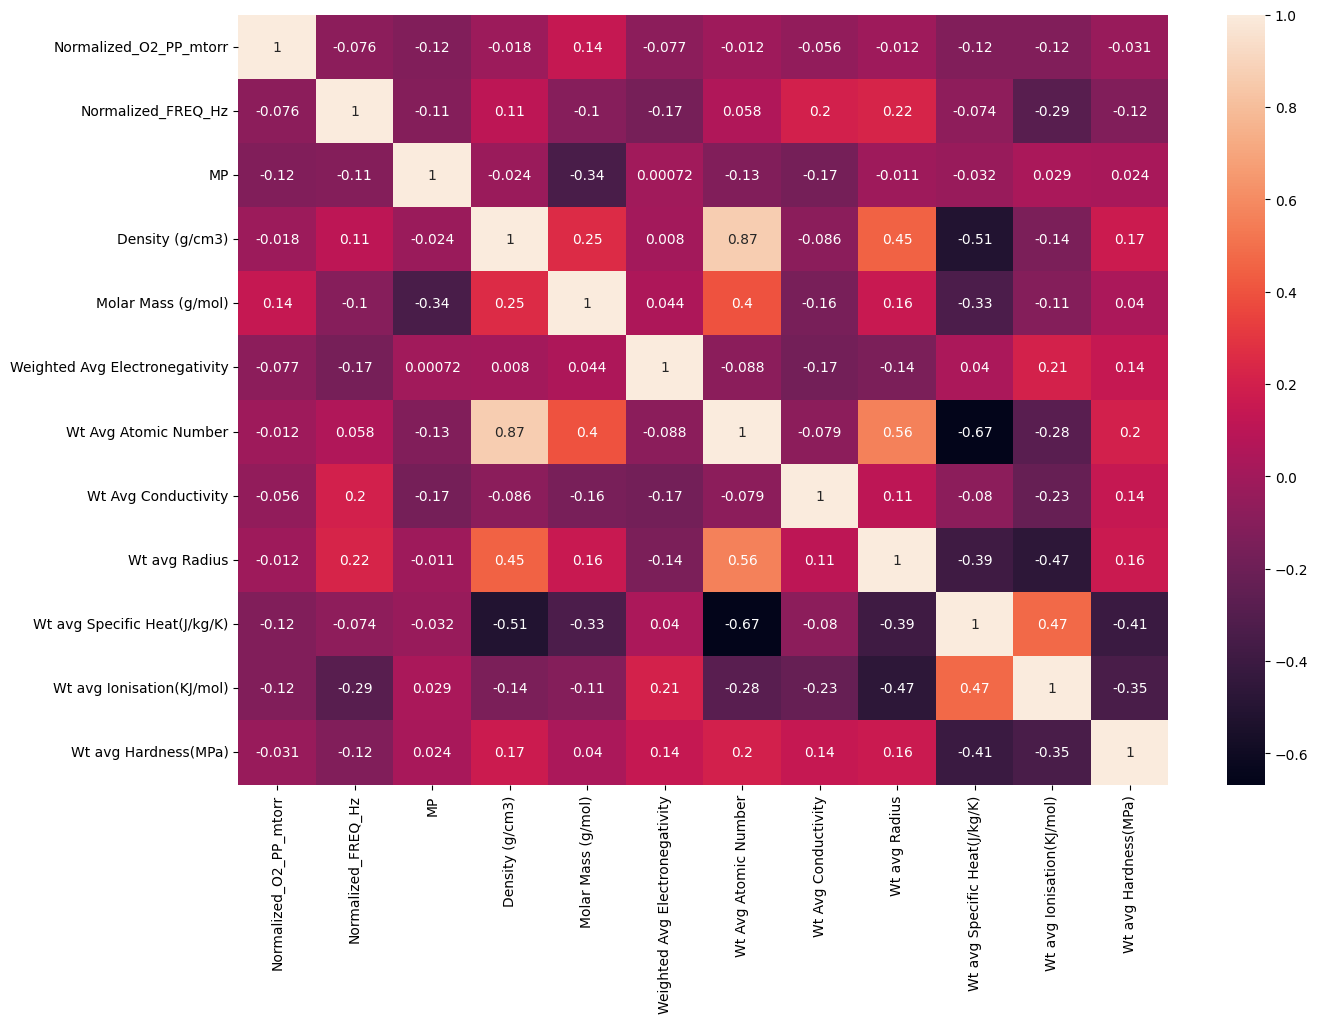

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True, ax=ax)
plt.show()

In [ ]:
data2.drop(['Normalized_FREQ_Hz','Density (g/cm3)','Weighted Avg Electronegativity', 'Wt Avg Atomic Number', 'Wt Avg Conductivity', 'Wt avg Radius', 'Wt avg Hardness(MPa)' ], axis=1, inplace=True)

In [ ]:
data2['MP'] = data2['MP'].astype(float)
data2['Molar Mass (g/mol)'] = data2['Molar Mass (g/mol)'].astype(float)

In [ ]:
data2.head()

,Normalized_O2_PP_mtorr,MP,Molar Mass (g/mol),Wt avg Specific Heat(J/kg/K),Wt avg Ionisation(KJ/mol)
0,8132.63,1975.0,81.380,492.39,986.51
1,36361.91,1050.0,666.190,306.60,623.96
2,447.89,1473.0,231.840,294.93,882.60
3,42.78,1967.0,82.940,654.89,906.68
4,115.18,1843.0,79.866,679.86,921.27


In [ ]:
X2 = data2.iloc[:,1:]
Y2 = data2.iloc[:,0]

In [ ]:
X2.head()

,MP,Molar Mass (g/mol),Wt avg Specific Heat(J/kg/K),Wt avg Ionisation(KJ/mol)
0,1975.0,81.380,492.39,986.51
1,1050.0,666.190,306.60,623.96
2,1473.0,231.840,294.93,882.60
3,1967.0,82.940,654.89,906.68
4,1843.0,79.866,679.86,921.27


In [ ]:
from itertools import accumulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r_squared_l2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_l2)
mse_l2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_l2)

R-squared: -0.793270596225085
Mean Squared Error: 42539318.40975651


In [ ]:
import xgboost as xgb

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters
params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
r_squared_x2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_x2)
mse_x2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_x2)

R-squared: -0.8238692987266398
Mean Squared Error: 43265169.79625618


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM Regressor
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r_squared_sv2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_sv2)
mse_sv2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_sv2)

R-squared: -0.1513233558830167
Mean Squared Error: 27311277.46788176


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
y_pred= nn_model.predict(X_test).flatten()

# Evaluate the model
r_squared_te2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_te2)
mse_te2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_te2)

1/1 [==============================] - 0s 209ms/step
R-squared: -0.0597538869931411
Mean Squared Error: 25139099.547874324


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_d2 = mean_squared_error(y_test, y_pred)
r_squared_d2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_d2)
print("Mean Squared Error:", mse_d2)

R-squared: -0.38036900647715544
Mean Squared Error: 32744615.79479366


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the random forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_r2 = mean_squared_error(y_test, y_pred)
r_squared_r2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_r2)
print("Mean Squared Error:", mse_r2)

R-squared: -0.7365729790318505
Mean Squared Error: 41194357.980508074


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the gradient boosting regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_g2 = mean_squared_error(y_test, y_pred)
r_squared_g2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_g2)
print("Mean Squared Error:", mse_g2)

R-squared: -0.6458726439798432
Mean Squared Error: 39042797.33998294


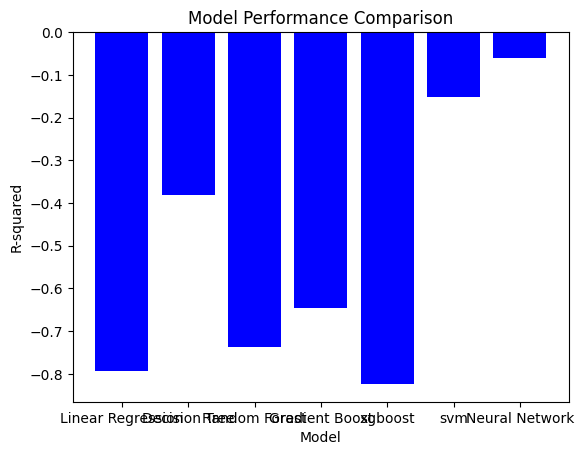

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost','xgboost','svm','Neural Network']

r_squared_values = [r_squared_l2, r_squared_d2, r_squared_r2, r_squared_g2,r_squared_x2,r_squared_sv2,r_squared_te2]

plt.bar(model_names, r_squared_values, color='blue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Performance Comparison')
plt.show()

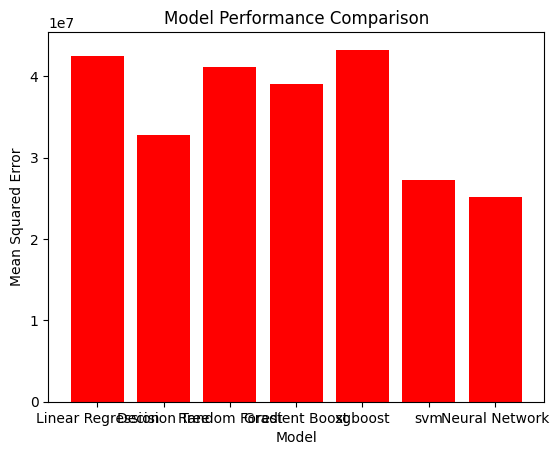

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost','xgboost','svm','Neural Network']

mse_values = [mse_l2, mse_d2,mse_r2,mse_g2,mse_x2,mse_sv2,mse_te2]

plt.bar(model_names, mse_values, color='red')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()

## If we take both pressure and temperature as output

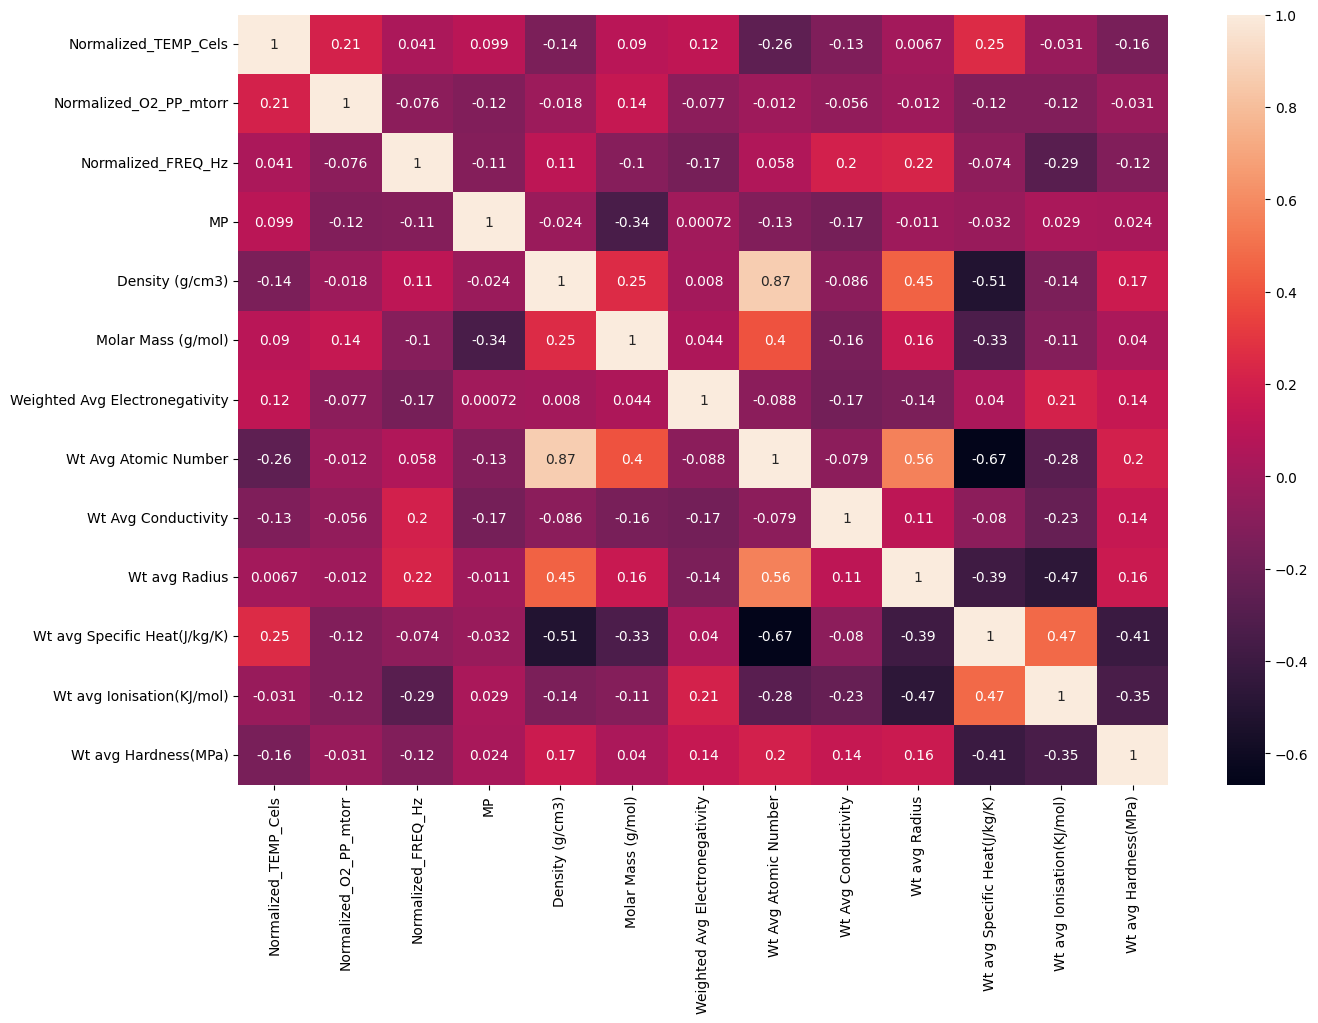

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, ax=ax)
plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X, Y = make_regression(n_samples=1000, n_features=10, n_targets=2, noise=0.1, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

base_estimator = RandomForestRegressor()

# Initialize the MultiOutputRegressor with the base estimator
model = MultiOutputRegressor(base_estimator)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance (you may use different metrics for multi-output regression)
mse_rf = mean_squared_error(Y_test, y_pred)
r_squared_rf = r2_score(Y_test, y_pred)
print("R-squared:", r_squared_rf)
print("Mean Squared Error:", mse_rf)

R-squared: 0.8251440011471811
Mean Squared Error: 4409.411689972432


In [ ]:
Y_train.ndim

2

In [ ]:
from itertools import accumulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r_squared_li = r2_score(y_test, y_pred)
print("R-squared:", r_squared_li)
mse_li = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_li)

R-squared: 0.9999996505759743
Mean Squared Error: 0.009066966390370206


In [ ]:
y_train.ndim

2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_dt = mean_squared_error(y_test, y_pred)
r_squared_dt = r2_score(y_test, y_pred)
print("R-squared:", r_squared_dt)
print("Mean Squared Error:", mse_dt)

R-squared: 0.3908886235172602
Mean Squared Error: 15499.856685867953


In [ ]:
from sklearn.neural_network import MLPRegressor

# Create a multi-layer perceptron regressor
model = MLPRegressor()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred)
r_squared_mlp = r2_score(y_test, y_pred)
print("R-squared:", r_squared_mlp)
print("Mean Squared Error:", mse_mlp)

R-squared: 0.9044243331550714
Mean Squared Error: 2539.4385741266497


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Create a multi-output Gaussian process regressor
model = MultiOutputRegressor(GaussianProcessRegressor())

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_gp = mean_squared_error(y_test, y_pred)
r_squared_gp = r2_score(y_test, y_pred)
print("R-squared:", r_squared_gp)
print("Mean Squared Error:", mse_gp)

R-squared: 0.5133824881940738
Mean Squared Error: 12772.756684556414


In [ ]:
y_train.ndim

2

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# Create a multi-output SVR model
model = MultiOutputRegressor(SVR())

# Train the model
model.fit(X_train, y_train)
mse_svr = mean_squared_error(y_test, y_pred)
r_squared_svr = r2_score(y_test, y_pred)
print("R-squared:", r_squared_svr)
print("Mean Squared Error:", mse_svr)

R-squared: 0.5133824881940738
Mean Squared Error: 12772.756684556414


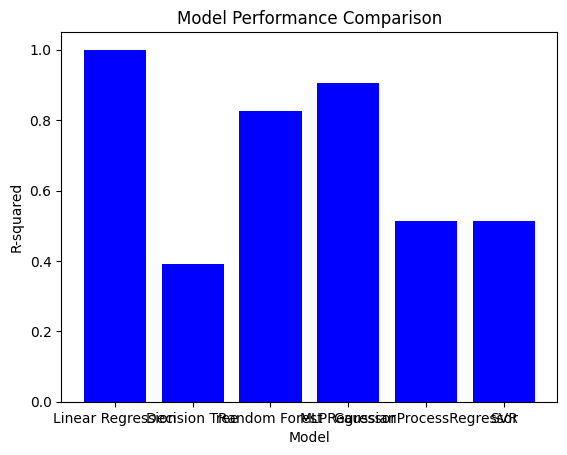

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'MLPRegressor','GaussianProcessRegressor','SVR']

r_squared_values = [r_squared_li, r_squared_dt, r_squared_rf, r_squared_mlp,r_squared_gp, r_squared_svr]

plt.bar(model_names, r_squared_values, color='blue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Performance Comparison')
plt.show()

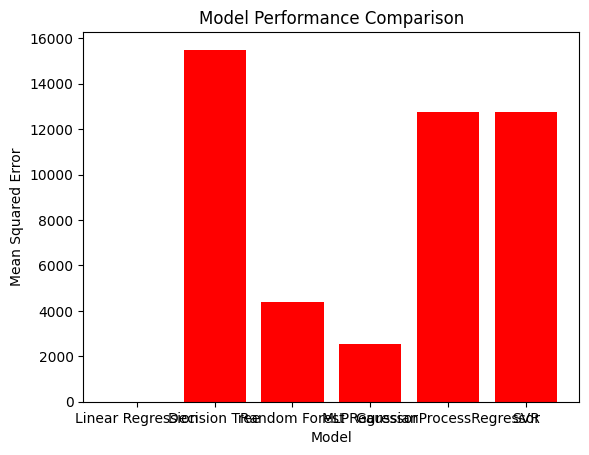

In [ ]:
   model_names =  ['Linear Regression', 'Decision Tree', 'Random Forest', 'MLPRegressor','GaussianProcessRegressor','SVR']
mse_values = [mse_li, mse_dt,mse_rf,mse_mlp,mse_gp,mse_gp]

plt.bar(model_names, mse_values, color='red')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()
